# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

From the DataSet Explanation: 
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

### Import and explore the data. Clean the data for outliers and missing values. 

In [7]:
import pandas as pd
import numpy as np 
data = pd.read_csv('../data/boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [8]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [9]:
data.shape

(404, 14)

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

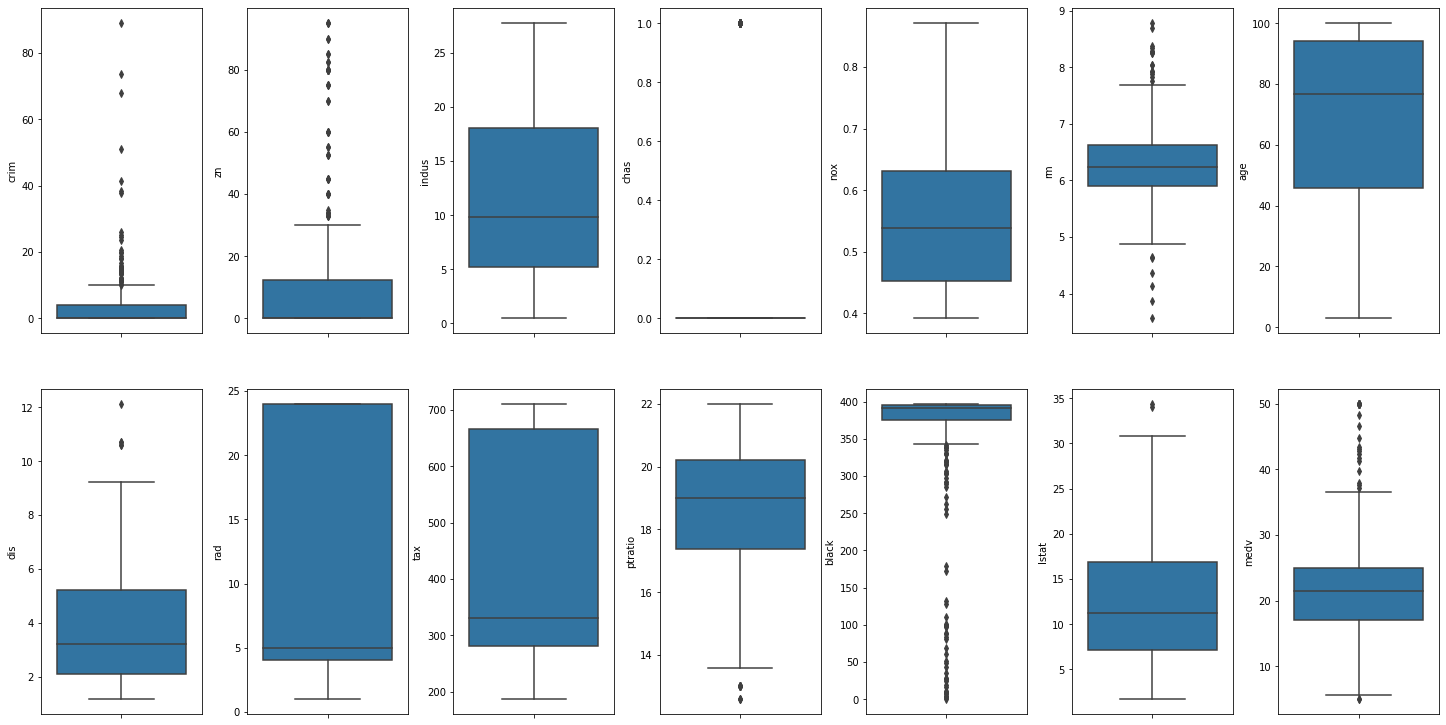

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B  clearly contain outliers. Let's evaluate the columns with outliers

In [13]:
  for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 10.40%
Column zn outliers = 12.13%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.20%
Column age outliers = 0.00%
Column dis outliers = 1.24%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.97%
Column black outliers = 15.10%
Column lstat outliers = 0.50%
Column medv outliers = 6.68%


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

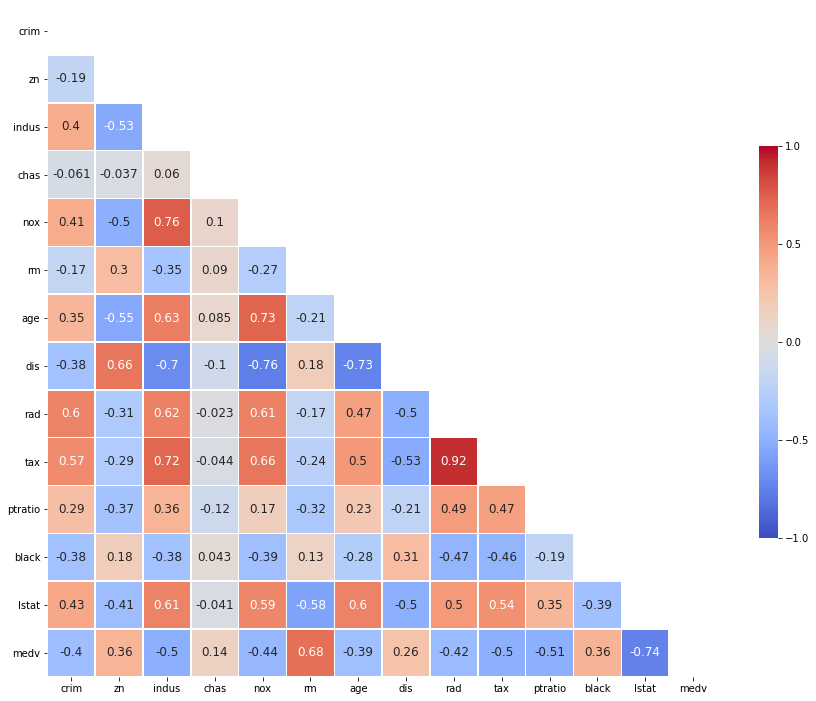

In [17]:
#Nice code I found for HeatMap
corr_matrix = data.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 18))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO have a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score

    return r2_score(y_true, y_predict)
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
from sklearn.model_selection import train_test_split

df = data.sample(frac=1)

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
# Five separate RFR here with the given max depths
max_depth = [2,4,6,8,10]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)


[0.7699201330416864, 0.90360721047324, 0.9420284372228221, 0.9548184910183928, 0.9590859547112461]
[0.7674703213377357, 0.8126636751347753, 0.8277950832119081, 0.8177495862073233, 0.8324066477096974]


Now, plot the score for each tree on the training set and on the testing set.

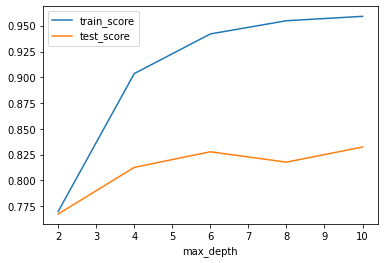

In [21]:
# Produce a plot with the score for the testing and training for the different max depths
d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[0.5530020698332152, 0.9590859547112461]
[0.5495400943528925, 0.8324066477096974]


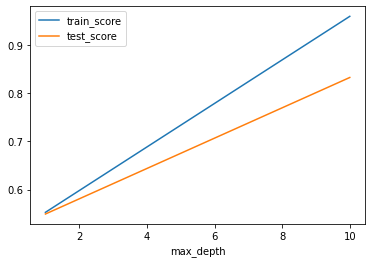

In [22]:
max_depth = [1,10]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)

d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

# Your response here
# The model with depth=1 has high bias
# The model with depth=10 has high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

[0.553002069833215, 0.7699201330416864, 0.86727613584239, 0.90360721047324, 0.926616672001254]
[0.5495400943528925, 0.7674703213377357, 0.7926682333068902, 0.8126636751347753, 0.8271447597269612]


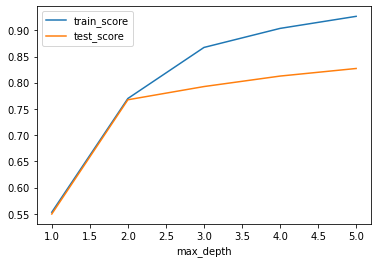

In [23]:
max_depth = [1,2,3,4,5]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)

d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

# Your response here
# Depth = 2 gives the best model. 
#More than that and it overfits the training data, which should give worse results in future data

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here